# 3 基本的な処理

## 3.1 準備と簡易デモザイク

### この節について

この節ではまずRAW画像を準備し、簡易的なデモザイクを行ってみます。

この節のの内容はColabノートブックとして公開してあります。ノートブックを見るには[目次ページ](https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_toc.ipynb)から参照するか、以下のリンクを使ってアクセスしてください。

https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_chapter_3_1.ipynb

### RAW画像の準備

まずRAW画像を用意します。今回はラズベリーパイで撮影したこの画像を使います[^1]。

[^1]: 撮影方法は付録１で解説します。

  ![最終的な画像](https://github.com/moizumi99/camera_raw_processing/raw/master/chart.jpg "最終的な画像")

元になるRAWファイルはこのURLにあります。

https://github.com/moizumi99/camera_raw_processing/raw/master/Figures/chart.jpg

拡張子はJPGになっていて実際にJPEG画像としても表示できますが、データ中にRAW画像が埋め込まれています。

では、colab上にダウンロードしてみましょう。

In [1]:
!if [ ! -f chart.jpg ]; then wget https://github.com/moizumi99/camera_raw_processing/raw/master/chart.jpg; fi

自分で撮影したRAWデータを使用する場合は次のコマンド利用してください。

In [2]:
# from google.colab import files
# uploaded = files.upload()

使いやすいようにRAWファイル名を変数に保存しておきます。

自分でアップロードしたファイルを使用する場合は、ファイル名を対象のファイルに書き換えてください。

In [3]:
raw_file  = "chart.jpg"

## RAW画像の読み込み

まず必用なモジュールをインストールします。

まずインストールするのはrawpyです。

rawpyはpythonでRAW画像を操作するためのモジュールです。

https://pypi.org/project/rawpy/

rawpyを使うとRAW画像からRAW画像データを取り出したり、画像サイズなどのパラメータを読み出したり、また簡易現像をすることができます。

rawpyの使用法については実際に使う時に説明します。

In [4]:
!pip install rawpy

colabではコマンドの最初に!をつけると、linuxコマンドが実行できます。pipはpythonのモジュール管理用のコマンドです。

次にimageioをインストールします。

imageioは画像の表示やロード・セーブなどを行うモジュールです。

In [5]:
!pip install imageio

次にこれらのモジュールをインポートします。

In [6]:
import rawpy, imageio

他に必用なモジュールがある場合はその都度importすることにします。

では先程ダウンロードしたRAWファイルをrawpyを使って読み出してみましょう。

`imread()`はrawデータをファイルから読み込むrawpyのメソッドです。

In [7]:
raw = rawpy.imread(raw_file)

読み込みがうまくいったか確認を兼ねてRAWデータの情報を見てみましょう。

まず、画像サイズを確認します。読み込んだRAWデータは、sizesというアトリビュートでサイズ確認ができます。

In [8]:
print(raw.sizes)

ImageSizes(raw_height=2464, raw_width=3280, height=2464, width=3280, top_margin=0, left_margin=0, iheight=2464, iwidth=3280, pixel_aspect=1.0, flip=0)


raw_heightとraw_widthはRAWデータのサイズです。この画像のサイズは縦2464ライン、横3280画素、ということになります。

heightとwidthは、画像処理後の出力画像のサイズです。

他の値についてはrawpyのページで解説されています。

https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.sizes

この画像を処理しやすくするために、numpyを使用します。

numpyはpython用の数値計算ライブラリーです。行列処理の機能が豊富なので画像処理にも向いています。

まず、numpyをnpという名前でインポートします。

In [9]:
import numpy as np

次にraw画像データから数値データのみをnumpyの配列に読み込みます。

In [10]:
raw_array = raw.raw_image

raw_imageはRAW画像データをnumpyの配列して渡すアトリビュートです。

縦横の大きさを取得しておきます。

In [11]:
h, w = raw_array.shape
print(h, w)

2464 3280


これでraw_arrayは2464 x 3280２次元配列になりました。
画像データを表示するコマンドimshowを使って、画像として確認してみましょう。

まずキャプション用に日本語フォントを用意します。

In [12]:
# 日本語フォントをインストール
!apt -y install fonts-ipafont-gothic

# 画像表示用ライブラリpyplotのインポート。
import matplotlib.pyplot as plt
# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


実際に画像を表示します。

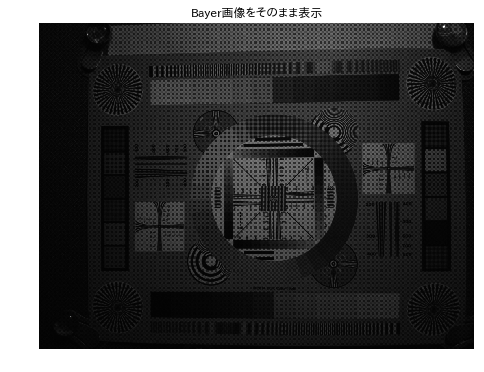

In [13]:
# 画像表示サイズを設定。figsizeの中身は横サイズ、縦サイズ。
# 単位はインチだが実際の表示サイズはディスプレイ解像度によって異なる。
plt.figure(figsize=(8, 6))
# raw_arrayの中のデータをグレースケールで表示します。
plt.imshow(raw_array, cmap='gray')
# 軸を非表示にします。
plt.axis('off')
# 画像タイトルの設定
plt.title(u"Bayer画像をそのまま表示")
# 実際に表示します。
plt.show()

ここでmatplotlibはnumpy用描画ライブラリーです。その中でpyplotは各種グラフを表示するモジュールです。ここではpltという名前でインポートしています。

もし日本語のタイトルが文字化けしている場合は、
`! rm /root/.cache/matplotlib/font*.json`を実行して、
Runtime->Restart Runtimeで再実行してみてください。

In [14]:
# もし日本語が文字化けしている場合次の行の#を削除して実行。
# !rm /root/.cache/matplotlib/font*.json
# その後、Runtime->Restart and run allで再実行

### この節のまとめ

必用なモジュールをインポートしてRAW画像をcolab上に読み込みました。
次は[簡易デモザイク処理](https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_chapter_3_2.ipynb)を行います。